In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans


#!pip install wordcloud
import wordcloud
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YunhaoYuan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 1.0 Data cleaning

**Procedure:**
1. Import original data from CSV file
2. Drop the duplicates and NaN entries
3. All characters in the abstract section are in lower case
4. Remove stopwords so that more focus can be given to the words that define the meaning of the text

*Note: As the process of removing stopwords is extremely time-consuming, the output is saved as 'Cleaned metadata.csv' for further exploration and analysis*

In [2]:
# # load the meta data from the CSV file 
# df=pd.read_csv('metadata.csv', usecols=['title','abstract','authors','doi','publish_time'])
# print('The shape of original dataframe:', df.shape)

# #drop duplicates
# df = df.drop_duplicates(subset='abstract', keep="first")

# #drop NANs 
# df=df.dropna()

# # convert abstracts to lowercase
# df["abstract"] = df["abstract"].str.lower()

# # Remove stop words
# def remove_stopwords(text):
#     words = text.split()
#     clean_text = [word for word in words if word not in stopwords.words('english')]
#     return ' '.join(clean_text)

# df["abstract"] = df["abstract"].apply(remove_stopwords)

# #show 10 lines of the new dataframe

# print ('The shape of cleaned dataframe:', df.shape)
# df.head(10)
# df.to_csv('Cleaned metadata.csv', index=False)

In [3]:
cleaned_data = pd.read_csv('Cleaned metadata.csv')
cleaned_data.head(10)

,title,doi,abstract,publish_time,authors
0,SIANN: Strain Identification by Alignment to N...,10.1101/001727,next-generation sequencing increasingly used s...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...
1,Spatial epidemiology of networked metapopulati...,10.1101/003889,emerging disease one infectious epidemic cause...,2014-06-04,Lin WANG; Xiang Li
2,Sequencing of the human IG light chain loci fr...,10.1101/006866,germline variation immunoglobulin gene (ig) lo...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...
3,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,deep sequencing clinical samples established t...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol
4,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,developing methods reconstruct transmission hi...,2014-11-11,Stephen P Velsko; Jonathan E Allen
5,The infant airway microbiome in health and dis...,10.1101/012070,nasopharynx (np) reservoir microbes associated...,2014-12-02,Shu Mei Teo; Danny Mok; Kym Pham; Merci Kusel;...
6,Using heterogeneity in the population structur...,10.1101/017178,"abstractin 2013, u.s. swine producers confront...",2015-03-27,Eamon B. O’Dea; Harry Snelson; Shweta Bansal
7,"Big city, small world: Density, contact rates,...",10.1101/018481,macroscopic descriptions populations commonly ...,2015-04-27,Moritz U. G. Kraemer; T. Alex Perkins; Derek A...
8,MERS-CoV recombination: implications about the...,10.1101/020834,recombination process unlinks neighbouring loc...,2015-06-12,Gytis Dudas; Andrew Rambaut
9,On the causes of evolutionary transition:trans...,10.1101/027722,pattern nucleotide transitions favored several...,2015-09-28,Arlin Stoltzfus; Ryan W. Norris


## 2.0 Data visualization and Exploratory Data Analysis

### 2.1 Visualize the types of coronavirus investigated by the research articles

According the Centres for Disease Control and Prevention (CDC), reference link: https://www.cdc.gov/coronavirus/types.html <br>
<br>
There are two main categories of Human Coronavirus:

- Common human coronaviruses
  1. 229E (alpha coronavirus)
  2. NL63 (alpha coronavirus)
  3. OC43 (beta coronavirus)
  4. HKU1 (beta coronavirus)
<br>
<br>
- Other human coronaviruses
  1. MERS-CoV (Middle East Respiratory Syndrome)
  2. SARS-CoV (Severe Acute Respiratory Syndrome)
  3. COVID-19 (SARS-CoV-2, coronavirus disease 2019)
  
**Observations / Insights** <br>

- There is only a small portion (14.9%) of research articles containing the investigations of common human coronavirues. Common human coronaviruses, including types 229E, NL63, OC43, and HKU1, usually cause mild to moderate upper-respiratory tract illnesses, like the common cold. Therefore, it is understandable that the main focus field of coronavirus research is other human coronaviruses such as MERS, SARS and COVID19, which can cause severe illness.
<br><br>
- For the other human coronaviruses, the SARS occured in 2002 receives the highest research focus (44.4%) as it has a total of 8096 confirmed cases and 774 deaths worldwide. Its number of confirmed cases surpasses that of MERS (28.8%) which occured in 2012 has a total of 2519 confirmed cases. As the COVID-19 was declared as a Public Health Emergency of International Concern on Jan.30.2020 and as pandecmic on March.11.2020, the time and resources have not been sufficiently devoted into related research. Therefore, currently the COVID19 has less related research articles compared with the SARS and MERS.
<br><br>
- In conclusion, there's no doubt that the priority of research focus will be on the COVID-19 as it has a total of over 1 million confirmed cases and more than 54,000 fatalities. 

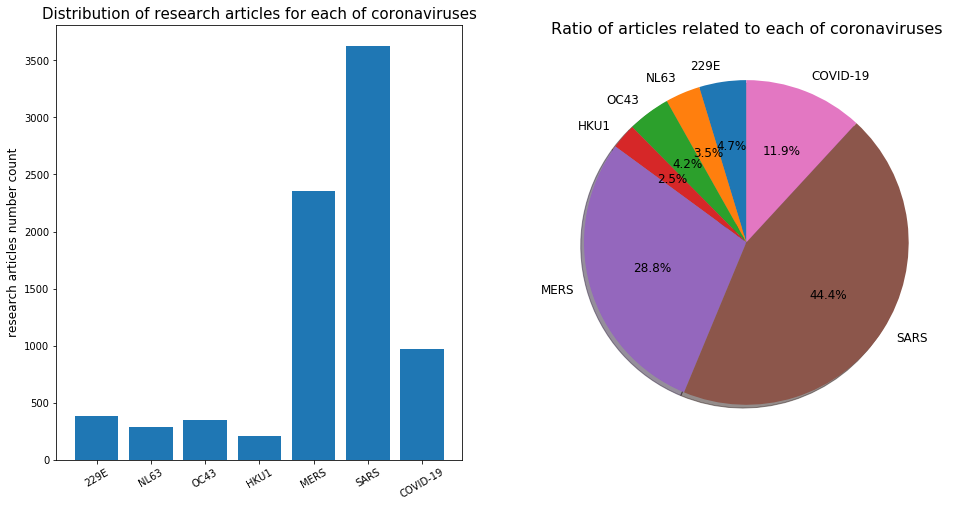

In [4]:
# As all the text in the abstract has been converted to lowercase, the keywords are also in lowercase
cleaned_data_1 = cleaned_data.copy()
# Keywords for coronavirus 229E
keywords_229e = '229e|hcov-229e'

# Keywords for coronavirus NL63
keywords_nl63 = 'nl63|hcov-nl63'

# keywords for coronavirus OC43
keywords_oc43 = 'oc43|hcov-oc43'

# keywords for coronavirus HKU1
keywords_hku1 = 'hku1|hcov-hku1'

# keywords for MERS
keywords_mers = 'mers|mers-cov'

# keywords for SARS
keywords_sars = 'sars|sars-cov'

# keywords for COVID19
keywords_covid19 = 'covid19|sars-cov-2|wuhan'

#create list of keywords
keywords=[keywords_229e, keywords_nl63, keywords_oc43, keywords_hku1, keywords_mers, keywords_sars, keywords_covid19]

#create list of coronaviruses
coronaviruses = ['229E', 'NL63', 'OC43', 'HKU1', 'MERS', 'SARS', 'COVID-19']

#Identify the types of coronavirus that each article is related
for coronavirus, keyword in zip(coronaviruses, keywords):
    cleaned_data_1[coronavirus] = cleaned_data_1['abstract'].str.contains(keyword)

#Convert the True/False to 1/0 to a form similar to one-hot encoding
cleaned_data_1[coronaviruses]=cleaned_data_1[coronaviruses].astype(int)

# Visualization of the results
Number_article =[]
for coronavirus in coronaviruses:
    number_a = cleaned_data_1[coronavirus].value_counts()[1]
    Number_article.append(number_a)

fig, axs = plt.subplots(1,2, figsize=(16,8))
plt.sca(axs[0])

x_tick = np.arange(len(coronaviruses))

plt.bar(x_tick, Number_article)
axs[0].set_xticks(x_tick)
axs[0].set_xticklabels(coronaviruses, fontsize=10, rotation = 30)
plt.ylabel('research articles number count', fontsize = 12)
plt.title('Distribution of research articles for each of coronaviruses', fontsize=15)

plt.sca(axs[1])
labels = coronaviruses
sizes = Number_article
plt.title('Ratio of articles related to each of coronaviruses', size = 16)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12});

### 2.2 Visualize the transmission pathsways for the coronavirus

The transmission of infectious diseases has two main pathways: Direct and Indirect. reference link: https://www.healthline.com/health/disease-transmission

- Direct transmission:
  1. Person-to-person contact
  2. Droplet spread
<br><br>
- Indirect transmission:
  1. Airborne transmission
  2. Contaminated objects
  3. Food and drinking water
  4. Animal-to-person contact
  5. Vector-borne
  
**Observations/Insights:**

- The top 3 transmission pathways of coronavirus based on the frequency of mentioning in research articles are animal-to-person (29.5%), airborne (28.4%) and person-to-person (15.0%). This ranking is in line with the facts of other human coronaviruses. For example, the origin of SARS can be traced through the intermediary of civets to cave-dwelling horseshoe bats in Yunnan province. The origin of MERS can be traced to the bats and camels in Saudi Arabia. Both of these coronaviruses are transmitted through the animal-to-person pathway in the first place.
<br><br>
- As the COVID-19 is quite new for the research field, it is important to study the lessons learned from its similar coronaviruses to understand its transmission pathways. After that, we can develop countermeasures based on the past experience of stopping the spread of the coronaviruses that have the same transmission pathways.

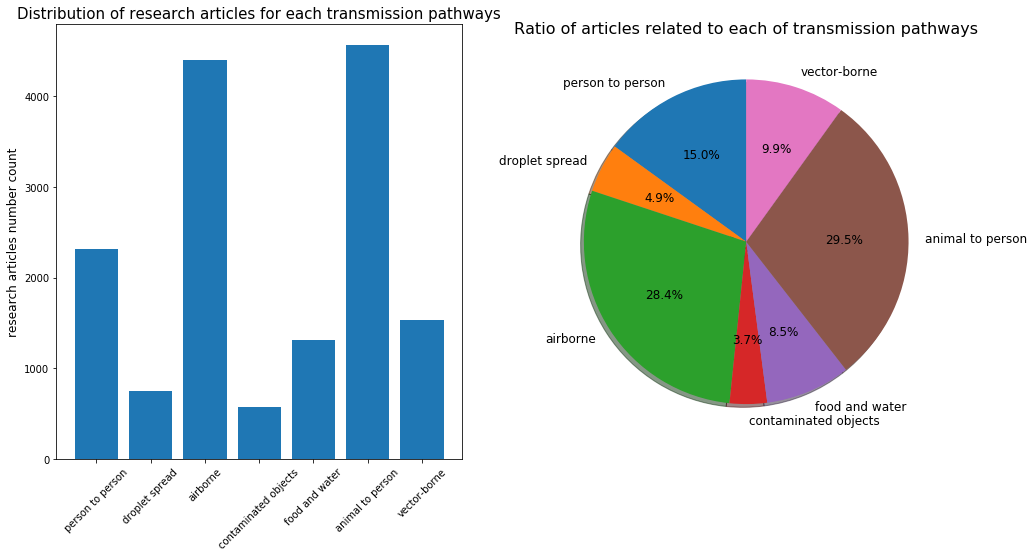

In [5]:
# As all the text in the abstract has been converted to lowercase, the keywords are also in lowercase
cleaned_data_2 = cleaned_data.copy()

# Keywords for person-to-person contact
keywords_ppc = 'person-to-person|person to person|blood|vertical transmission|pregnancy|body fluids'

# Keywords for droplets spread
keywords_droplets = 'droplets|cough|sneezing|droplet'

# Keywords for airborne transmission
keywords_airborne = 'airborne|air'

# Keywords for contaminated objects
keywords_co = 'fecal|fecal-oral'

# Keywords for undercoooked food and contaminated drinking water
keywords_fw = 'food|water|undercooked'

# keywords for animal to person contact
keywords_animal = 'animal|bats|camel'

# keywords for vector borne disease
keywords_vector ='vector|insect|fomites'

#create list of keywords
keywords=[keywords_ppc, keywords_droplets, keywords_airborne, keywords_co, keywords_fw, keywords_animal, keywords_vector]

#create list of pathways
pathways = ['person to person', 'droplet spread', 'airborne', 'contaminated objects', 'food and water', 'animal to person', 'vector-borne']

#Identify the types of coronavirus that each article is related
for pathway, keyword in zip(pathways, keywords):
    cleaned_data_2[pathway] = cleaned_data_2['abstract'].str.contains(keyword)

#Convert the True/False to 1/0 to a form similar to one-hot encoding
cleaned_data_2[pathways]=cleaned_data_2[pathways].astype(int)

# Visualization of the results
Number_article =[]
for pathway in pathways:
    number_a = cleaned_data_2[pathway].value_counts()[1]
    Number_article.append(number_a)

fig, axs = plt.subplots(1,2, figsize=(16,8))
plt.sca(axs[0])

x_tick = np.arange(len(pathways))

plt.bar(x_tick, Number_article)
axs[0].set_xticks(x_tick)
axs[0].set_xticklabels(pathways, fontsize=10, rotation = 45)
plt.ylabel('research articles number count', fontsize = 12)
plt.title('Distribution of research articles for each transmission pathways', fontsize=15)

plt.sca(axs[1])
labels = pathways
sizes = Number_article
plt.title('Ratio of articles related to each of transmission pathways', size = 16)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12});


### 2.3 Visualize the high frequency words in COVID-19 related research articles

The abstract of each research article contains important findings and conclusions. Therefore, a wordcloud graph helps to identify the words related to COVID-19 that matters the most based on their high frequency of occurrence.

**Observations/Insights**

- The top words from the word clouds are the alias of COVID-19 such as 'novel coronavirus', 'SARS-CoV-2'
<br><br>
- There is no main transmission pathways related words in the worldcloud, suggesting the research on COVID-19 is still at early stage and no definite conclusions or findings is available. The research is mainly conducted on the patients as the patients has the highest frequency of occurrence. The main symptom of the COVID-19 is related to respiratory system as the words like 'acute respiratory' and 'respiratory syndrome' have high frequency of occurrence.
<br><br>
- The two important words that describes COVID-19 is 'epidemic' and 'infection'. The location of its outbreak being greequently mentioned is 'Wuhan China'.

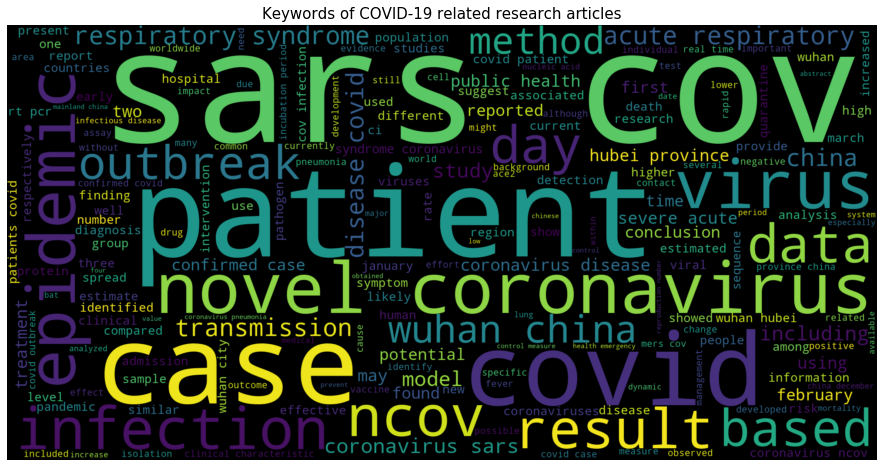

In [6]:
def split_list_into_word(text_list):
    words_list = []
    templist = []
    for i in range(len(text_list)):
        templist = text_list[i].split()
        for word in templist:
            words_list.append(word)
    return words_list

covid19_list = []

# Collect abstracts of COVID-19 related articles
for i in range (cleaned_data_1.shape[0]):
    code = cleaned_data_1['COVID-19'][i]
    if code == 1:
        covid19_list.append(cleaned_data_1['abstract'][i])

# Split the texts into words to plot wordcloud
covid19_words_list = split_list_into_word(covid19_list)
covid19_words_list = ' '.join(covid19_words_list)

wordcloud = WordCloud(width=2000, height=1000).generate(covid19_words_list)

plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keywords of COVID-19 related research articles', fontsize=15);

## 3.0 Model selection and fitting to data

In this section, Minibatch kmeans model, an unsupervised machine learning model for clustering, is used for getting different aspect of insights about the information related to transmission pathways and symptoms of coronaviruses so that effective countermeasures for tackling the COVID-19 spread can be proposed. 

**Justification for model selection:** <br>
Minibatch kmeans model is selected to cluster the research articles related to transmission pathways related to for the following two reasons

- Kmeans algorithm is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum.
<br><br>
- Mini Batch K-means algorithm‘s main idea is to use small random batches of data of a fixed size, so they can be stored in memory. Each iteration a new random sample from the dataset is obtained and used to update the clusters and this is repeated until convergence. It can obtain a substantial saving of computational time at the expense of some loss of cluster quality compared with a full batch Kmeans algorithm.

**Justification for model hyperparameters tuning:** <br>
The elbow method is used for the hyperparameter tuning for MiniBatch Kmeans model to determine the optimal number of clusters. The cost for the Kmeans model is the sum of squared errors. The basic idea behind this method is that it plots the various values of cost with changing k. As the value of K increases, there will be fewer elements in the cluster. So average distortion will decrease. The lesser number of elements means closer to the centroid. So, the point where this distortion declines the most is the elbow point. From the graph plotted, the optimal number of clusters is determined as 11.

**Justification for the 2D PCA visualizations of clusters:** <br>
After the clustering by the MiniBatch kmeans model, I choose to project the randomly selected 500 samples on a 2D principal components space to have a very general idea of how well the clustering is working. The reason for only choosing 500 samples instead of showing all 12,000 sample is that in that way the projection graph will not be too messy. From the scatter graph plotted, it can be found that there are a few distinctive clusters and a few clusters overlapping with each other. The distinctive clusters suggest the minibatch kmeans model separates the clusters well. The clusters overlapping with each other suggest that 2 principal components are not enough to achieve high explained variance. However, 4 or 5 principal components may good for the explained variances for the clusters, they are also hard to visualize. Therefore, 2 dimensional principal components visualization is used for getting the basic ideas of the clustering model performance.

**Procedure for model impelmentation, hyperparameters tuning and clustering visualization:**

1. Select all the research articles that related to transmission pathways based on the distribution from section 2.2
2. Use Term Frequency–Inverse Document Frequency (TF-IDF) method with 5000 top frequent words to process the abstracts
3. Fit the processed data to the Minibatch Kmeans model with a range of number of clusters
4. Find the optimal number of clusters for the Minibatch Kmeans model using the Elbow method
5. Fit the processed data to Minibatch Kmeans model with optimal number of clusters
6. Visualize the clusters with 500 randomly selected samples in a 2D PCA space
7. Extract the top 10 most important words (with highest frequency) from each of the cluster


**Results and interpretation:** <br>

|Cluster number|Top 10 keywords|Interpretation|
|:-|:-|:-|
|1|bcov, rotavirus, samples, cattle, dairy, herds, diarrhea, bovine, calf, calves|This cluster contains the articles related to bovine respiratory coronavirus. The keywords suggests the origin of bcov is the cattles and the main symptoms is diarrhea|
|2|sont, est, dans, une, le, en, et, des, les, la|The keywords from this cluster is hard to interpret. One possible reason for these weird keywords is the abstract of these articles contains garbage characters from pictures or links|
|3|samples, pneumonia, viral, infection, asthma, clinical, infections, children, patients, respiratory|This cluster contains the articles related to the symptoms of coronavirus on children patients. The main symptoms are pneumonia, asthma and respiratory related problems.|
|4|middle, human, east, camels, syndrome, respiratory, coronavirus, sars, mers, cov|This cluster contains the articles related to MERS. The origin of MERS is the camels in Middle East and the main symptom is the respiratory syndromes.|
|5|respiratory, 2009, infection, avian, h5n1, viruses, pandemic, h1n1, virus, influenza|This cluster contains the articles related to influenza viruses such as H1N1 and H5N1. In 2009, H1N1 was declared as pandemic. Its origin is avian animals such as chicken. Its main symptom is related to respiratory system.|
|6|animal, risk, transmission, air, public, human, infectious, disease, diseases, health|This clusster contains the articles related to the transmission of coronavirus. The most likely transmission pathways of coronavirus are through animals and air. The main risk of coronavirus is its threat to the public health.|
|7|fipv, ang, cat, felv, fcov, angiotensin, fip, ace2, feline, cats|This cluster contains the articles related to the feline coronavirus. The keywords suggest the origin of the fcov is the felines such as cats.|
|8|genome, sequence, pedv, gene, proteins, viruses, viral, protein, rna, virus|This cluster contains the articles related to the structure of the coronavirus. The coronavirus is a RNA virus can be translated into protein and the research focus is about the gene sequence and structure|
|9|covs, viral, hosts, host, coronaviruses, virus, viruses, species, bat, bats|This cluster contains the articles related to the coronavirus originated from the bats. No keywords related to symptoms are found.|
|10|coronavirus, china, wuhan, ncov, sars, cases, 2019, 19, covid, patients|This cluster contains the articles related to the COVID-19. Its outbreak location is Wuhan China. No keywords related to origins or symptoms are found, suggesting the research is still in the early stage|
|11|responses, il, expression, ifn, virus, immune, infection, mice, cell, cells|This cluster contains the possible treament for the coronavirus. The research is focused on the immune response to the coronavirus such as Interferon (IF) response. The experiments are likely to be conducted on mice.|

In [7]:
# Collect all research articles that are related to transmission pathways
cleaned_data_pathways = cleaned_data_2.loc[(cleaned_data_2['person to person']==1)|
                                          (cleaned_data_2['droplet spread']==1)|
                                           (cleaned_data_2['airborne']==1)|
                                           (cleaned_data_2['contaminated objects']==1)|
                                           (cleaned_data_2['food and water']==1)|
                                           (cleaned_data_2['animal to person']==1)|
                                           (cleaned_data_2['vector-borne']==1)].copy()

print(cleaned_data_pathways.shape)
cleaned_data_pathways.head(3)

(12484, 12)


,title,doi,abstract,publish_time,authors,person to person,droplet spread,airborne,contaminated objects,food and water,animal to person,vector-borne
5,The infant airway microbiome in health and dis...,10.1101/012070,nasopharynx (np) reservoir microbes associated...,2014-12-02,Shu Mei Teo; Danny Mok; Kym Pham; Merci Kusel;...,0,0,1,0,0,0,0
6,Using heterogeneity in the population structur...,10.1101/017178,"abstractin 2013, u.s. swine producers confront...",2015-03-27,Eamon B. O’Dea; Harry Snelson; Shweta Bansal,0,0,1,0,0,1,0
8,MERS-CoV recombination: implications about the...,10.1101/020834,recombination process unlinks neighbouring loc...,2015-06-12,Gytis Dudas; Andrew Rambaut,0,0,0,0,0,1,0


In [8]:
# Feature extraction with TF-IDF method 
tfidf = TfidfVectorizer(max_features = 5000, stop_words="english")
tfidf.fit(cleaned_data_pathways.abstract.values)
features = tfidf.transform(cleaned_data_pathways.abstract.values)
features

<12484x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1016866 stored elements in Compressed Sparse Row format>

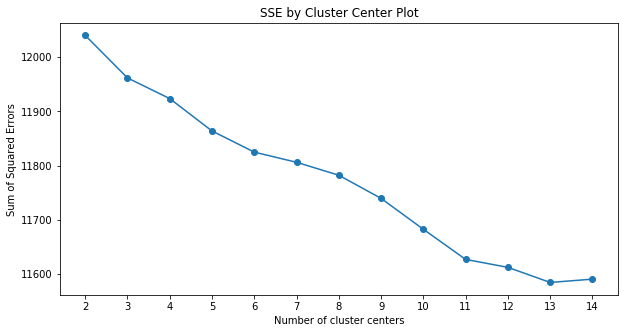

In [9]:
# Find the optimal number of clusters for the minibatch kmeans model

sum_squared_errors = []

num_cluster = range(2,15,1)
for k in num_cluster:
    sse = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=0).fit(features).inertia_
    sum_squared_errors.append(sse)
        
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(num_cluster, sum_squared_errors, marker='o')
ax.set_xlabel('Number of cluster centers')
ax.set_xticks(num_cluster)
ax.set_xticklabels(num_cluster)
ax.set_ylabel('Sum of Squared Errors')
ax.set_title('SSE by Cluster Center Plot');

Text(0.5, 1.0, 'PCA Cluster Plot')

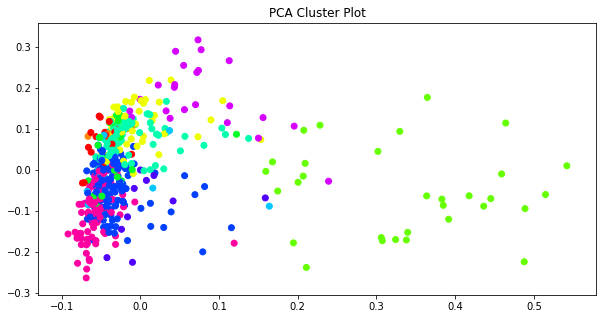

In [10]:
# By observing the SSE plot above, the optimal number of clusters is 14
clusters = MiniBatchKMeans(n_clusters=11, init_size=1024, batch_size=2048, random_state=0).fit_predict(features)

# Visualize the clusters through PCA dimentionality reduction
num_clusters = 11
#Transform TD-IDF features from sparse matrix to dense form
dense_features = features.todense()      

# Randomly sample 5000 articles for dimensionality reduction
sampled_items = np.random.choice(range(features.shape[0]), size=5000, replace=False)
reduced_features = PCA(n_components=2).fit_transform(dense_features[sampled_items,:])

# For better visualization, only show 500 samples from the random sampled set
index = np.random.choice(range(reduced_features.shape[0]), size=500, replace=False)
cluster_subset = clusters[sampled_items]
cluster_subset = [cm.hsv(i/num_clusters) for i in cluster_subset[index]]
    
fig, ax = plt.subplots(figsize=(10, 5))
    
ax.scatter(reduced_features[index, 0], reduced_features[index, 1], c=cluster_subset)
ax.set_title('PCA Cluster Plot')

In [11]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i+1))
        print(', '.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(features, clusters, tfidf.get_feature_names(), 10)


Cluster 1
bcov, rotavirus, samples, cattle, dairy, herds, diarrhea, bovine, calf, calves

Cluster 2
sont, est, dans, une, le, en, et, des, les, la

Cluster 3
samples, pneumonia, viral, infection, asthma, clinical, infections, children, patients, respiratory

Cluster 4
middle, human, east, camels, syndrome, respiratory, coronavirus, sars, mers, cov

Cluster 5
respiratory, 2009, infection, avian, h5n1, viruses, pandemic, h1n1, virus, influenza

Cluster 6
animal, risk, transmission, air, public, human, infectious, disease, diseases, health

Cluster 7
fipv, ang, cat, felv, fcov, angiotensin, fip, ace2, feline, cats

Cluster 8
genome, sequence, pedv, gene, proteins, viruses, viral, protein, rna, virus

Cluster 9
covs, viral, hosts, host, coronaviruses, virus, viruses, species, bat, bats

Cluster 10
coronavirus, china, wuhan, ncov, sars, cases, 2019, 19, covid, patients

Cluster 11
responses, il, expression, ifn, virus, immune, infection, mice, cell, cells


## 4.0 Deriving insights about policy and guidance to tackle the outbreak based on model findings



**For the scientists:**<br>
1. Action item: Allocate all available resource on the COVID-19 research to understand its symptoms and transmission pathways 
   - Based on the distirbution of research articles explored in section 2.1, the research on COVID-19 is still at a very early stage thus there's lack of understanding of its symptoms and transmission pathways. As the keywords of cluster 10 from the clustering model in section 3.0 suggests, the consensus of COVID-19 is that its first outbreak is in Wuhan, China and it's related to SARS. There's still lack of understanding on the COVID-19's transmission pathways and main symptoms.
<br><br>
2. Action item: Propose temporary treatments and countermeasures based on the findings from other human coronaviruses
   - As the research in the area of other human coronavirus such as SARS and MERS is quite developed, the scientists should explore the possibility of applying the treatments that are effective on SARS to COVID-19 to reduce fatality. As the cluster 11 from the clustering model in section 3.0 suggests, the treatment is mainly related to the immune response to the virus.
   
   
**For the doctors and nurses and healthcare professionals:** <br>
1. Action item: Use all available personal protective equipment (PPE)
   - Although the transmission pathways for COVID-19 is unclear now, the keywords of the cluster 6 containing the transmission pathways for other human coronaviruses and graph in section 2.2 both suggest the high possibility of animal-to-person, person-to-person and airborne transmission. The doctors, nurses and healthcare professionals should use every precausions when treating the patients, starting with wearing every possible and available personal protective equipement such as masks, goggles and isolation gown.

**For the industry:** <br>
1. Action item: Manufacturing industry should pivot to produce personal protective equipments as many as possible
   - Based on the suggestions provided for the doctors and healthcare professionals, the manufacturing industry should do what they can to support the frontline fighters with enough amount of personal protective equipment.
<br><br>
2. Action item: Medical equipment industry should manufacture medical equipment for supporting respiratory systems such as ventilators
   - Based on the keywords extracted from the clustering model in section 3.0, the coronaviruses mainly cause problems related to the respiratory systems. Therefore, it is important that there will be enough medical supplies and equipment that can support the patients through the symptoms. In this way, the fatality rate can be minimized. 

**For the governments:** <br>
1. Action item: Ask the people to avoid person-to-person contact through administrative orders
    - Based transmission pathways of coronavirus presented in section 2.2, the government should focus on how to minimize the person-to-person contact in order to slow and stop the COVID-19 spread. These administrative orders can include the staying home orders and practicing social distance orders.
<br><br>
2. Action item: Set up laws and regulations of prohibiting the wildlife trading to avoid facing new coronavirus in the future
    - Based on both the transmission pathways ratio in section 2.2 and the keywords from some clusters, the origins of most known coronavirus are from wild animals. These coronavirused are mainly transmitted through animal-to-person contact. Reducing the chance of animal-to-person contact by forbiding wildlife trading helps reduce the probability of a outbreak of a new coronavirus.